In [1]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:0000:01


In [ ]:
import pandas as pd
import imblearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
appl_stock = pd.read_csv("/kaggle/input/appled/aapl.csv")

In [5]:
nvda_stock = pd.read_csv("/kaggle/input/nvda-stock/nvda.csv")

In [6]:
tsla_stock = pd.read_csv("/kaggle/input/teslastock/tsla.csv")

In [7]:
aapl_hdl = pd.read_csv("/kaggle/input/fin-hdl/finance_headlines.csv")

In [8]:
nvda_hdl = pd.read_csv("/kaggle/input/new-finhdl/finance_headlines_nw.csv")

In [9]:
tsla_hdl = pd.read_csv("/kaggle/input/finhandled/finhdl.csv")

In [10]:
appl_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,Label
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500,NaN,no_change
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600,0.010314,increase
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166634,80962700,-0.010605,decrease
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700,0.036794,increase
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800,0.004089,no_change


In [11]:
# appl_stock = appl_stock[['Date','Price_Change', 'Label']]

In [12]:
# nvda_stock = nvda_stock[['Date','Price_Change', 'Label']]

In [13]:
# tsla_stock = tsla_stock[['Date','Price_Change', 'Label']]

In [14]:
appl_stock['Date'] = pd.to_datetime(appl_stock['Date'], format='%Y-%m-%d')
aapl_hdl['Date'] = pd.to_datetime(aapl_hdl['Date'], format='%d-%m-%Y')

In [15]:
nvda_stock

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,Label
0,2023-01-03,14.851000,14.996000,14.096000,14.315000,14.306805,401277000,NaN,no_change
1,2023-01-04,14.567000,14.853000,14.241000,14.749000,14.740556,431324000,0.030318,increase
2,2023-01-05,14.491000,14.564000,14.148000,14.265000,14.256833,389168000,-0.032816,decrease
3,2023-01-06,14.474000,15.010000,14.034000,14.859000,14.850493,405044000,0.041640,increase
4,2023-01-09,15.284000,16.056000,15.141000,15.628000,15.619054,504231000,0.051753,increase
...,...,...,...,...,...,...,...,...,...
312,2024-04-02,88.447998,90.094002,87.620003,89.452003,89.444656,433064000,-0.010082,decrease
313,2024-04-03,88.484001,90.374001,88.400002,88.963997,88.956688,370067000,-0.005456,no_change
314,2024-04-04,90.405998,90.634003,85.879997,85.904999,85.897942,434965000,-0.034385,decrease
315,2024-04-05,86.865997,88.481003,85.926003,88.008003,88.000778,399678000,0.024481,increase


In [16]:
tsla_hdl

,published_date,headlines
0,01-01-2023,"['‘OK, Mexico, Save Me’: After China, This Is ..."
1,02-01-2023,['China’s Young Elite Clamber for Government J...
2,03-01-2023,['Wave of Job-Switching Has Employers on a Tra...
3,04-01-2023,"['Father Deliberately Drove Car Off Cliff, Aut..."
4,05-01-2023,"['Amazon Expands Corporate Layoffs to 18,000 J..."
...,...,...
461,06-04-2024,['U.S. Warns China About Its Exports and Suppo...
462,07-04-2024,['Q: Who Found a Way to Crack the U.K.’s Premi...
463,08-04-2024,"['Maryland Passes 2 Major Privacy Bills, Despi..."
464,09-04-2024,['Tesla Settles Lawsuit Over a Fatal Crash Inv...


In [17]:
nvda_stock['Date'] = pd.to_datetime(nvda_stock['Date'], format='%Y-%m-%d')
nvda_hdl['Date'] = pd.to_datetime(nvda_hdl['published_date'], format='%Y-%m-%d')

In [18]:
tsla_stock['Date'] = pd.to_datetime(tsla_stock['Date'], format='%Y-%m-%d')
tsla_hdl['Date'] = pd.to_datetime(tsla_hdl['published_date'], format='%d-%m-%Y')

In [19]:
appl_stock_news = pd.merge(appl_stock, aapl_hdl, on='Date', how='inner')

label_mapping = {'increase': 1, 'decrease': -1, 'no_change': 0}
appl_stock_news['Label'] = appl_stock_news['Label'].replace(label_mapping)


/tmp/ipykernel_33/1013012647.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  appl_stock_news['Label'] = appl_stock_news['Label'].replace(label_mapping)


In [20]:
nvda_stock_news = pd.merge(nvda_stock, nvda_hdl, on='Date', how='inner')

label_mapping = {'increase': 1, 'decrease': -1, 'no_change': 0}
nvda_stock_news['Label'] = nvda_stock_news['Label'].replace(label_mapping)

/tmp/ipykernel_33/531126936.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nvda_stock_news['Label'] = nvda_stock_news['Label'].replace(label_mapping)


In [21]:
tsla_stock_news = pd.merge(tsla_stock, tsla_hdl, on='Date', how='inner')

label_mapping = {'increase': 1, 'decrease': -1, 'no_change': 0}
tsla_stock_news['Label'] = tsla_stock_news['Label'].replace(label_mapping)

/tmp/ipykernel_33/3635023046.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tsla_stock_news['Label'] = tsla_stock_news['Label'].replace(label_mapping)


In [22]:
# nvda_stock_news.drop(['published_date'], axis=1, inplace=True)
tsla_stock_news.drop(['published_date'], axis=1, inplace=True)

In [23]:
tsla_stock_news

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,Label,headlines
0,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,NaN,0,['Wave of Job-Switching Has Employers on a Tra...
1,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,0.051249,1,"['Father Deliberately Drove Car Off Cliff, Aut..."
2,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,-0.029039,-1,"['Amazon Expands Corporate Layoffs to 18,000 J..."
3,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,0.024651,1,['Even a Soft Landing for the Economy May Be U...
4,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,0.059349,1,['Phoenix Police Investigate Their Detention o...
...,...,...,...,...,...,...,...,...,...,...
312,2024-04-02,164.750000,167.690002,163.429993,166.630005,166.630005,116650600,-0.049024,-1,['Poor Nations Are Writing a New Handbook for ...
313,2024-04-03,164.020004,168.820007,163.279999,168.380005,168.380005,82950100,0.010502,1,['Biden and Corporate America? It’s ‘Complicat...
314,2024-04-04,170.070007,177.190002,168.009995,171.110001,171.110001,123162000,0.016213,1,['How to Revive a Burned Forest? Rebuild the T...
315,2024-04-05,169.080002,170.860001,160.509995,164.899994,164.899994,141250700,-0.036292,-1,['China’s Young People Are Giving Up on Saving...


In [24]:
from nltk.stem import PorterStemmer
import nltk
stemmer = PorterStemmer()

In [25]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [26]:
from textblob import TextBlob

In [27]:
def preprocess(text):
    doc = nlp(text)
    no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    token = " ".join(no_stop_words)
    token = [token.lemma_ for token in nlp(token)]
    token = " ".join(token)
    token = [stemmer.stem(token.text) for token in nlp(token)]
    token = " ".join(token)
    return token

In [28]:
nvda_stock_news['headlines'] = nvda_stock_news['headlines'].apply(preprocess)

In [29]:
appl_stock_news['headlines'] = appl_stock_news['headlines'].apply(preprocess)

In [30]:
tsla_stock_news['headlines'] = tsla_stock_news['headlines'].apply(preprocess)

In [31]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [32]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [33]:
appl_stock_news['subjectivity'] = appl_stock_news['headlines'].apply(get_subjectivity)

In [34]:
nvda_stock_news['subjectivity'] = nvda_stock_news['headlines'].apply(get_subjectivity)

In [35]:
tsla_stock_news['subjectivity'] = tsla_stock_news['headlines'].apply(get_subjectivity)

In [36]:
appl_stock_news['polarity'] = appl_stock_news['headlines'].apply(get_polarity)

In [37]:
nvda_stock_news['polarity'] = nvda_stock_news['headlines'].apply(get_polarity)

In [38]:
tsla_stock_news['polarity'] = tsla_stock_news['headlines'].apply(get_polarity)

In [39]:
def SIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [40]:
compounded = []
negative =[]
positive = []
neutral = []

for i in range(len(appl_stock_news['headlines'])):
    scores =SIA(appl_stock_news['headlines'][i])
    compounded.append(scores['compound'])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])

In [41]:
len(appl_stock_news['headlines'])

317

In [42]:
compound = []
neg =[]
pos = []
neu = []

for i in range(len(nvda_stock_news['headlines'])):
    scores = SIA(nvda_stock_news['headlines'][i])
    compound.append(scores['compound'])
    neg.append(scores['neg'])
    neu.append(scores['neu'])
    pos.append(scores['pos'])

In [43]:
compounds = []
negs =[]
poss = []
neus = []

for i in range(len(nvda_stock_news['headlines'])):
    scores = SIA(tsla_stock_news['headlines'][i])
    compounds.append(scores['compound'])
    negs.append(scores['neg'])
    neus.append(scores['neu'])
    poss.append(scores['pos'])

In [45]:
len(compound)

317

In [46]:
nvda_stock_news['compound'] = compound
nvda_stock_news['negative'] = neg
nvda_stock_news['positive'] = pos
nvda_stock_news['neutral'] = neu

In [47]:
appl_stock_news['compound'] = compounded
appl_stock_news['negative'] = negative
appl_stock_news['positive'] = positive
appl_stock_news['neutral'] = neutral

In [48]:
tsla_stock_news['compound'] = compounds
tsla_stock_news['negative'] = negs
tsla_stock_news['positive'] = poss
tsla_stock_news['neutral'] = neus

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE(sampling_strategy='minority')

In [ ]:
appl_stock_news.fillna(0)

In [ ]:
tsla_stock_news.fillna(0)

In [ ]:
tsla_stock_news.fillna(0)

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
A_X = appl_stock_news.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Price_Change', 'negative', 'positive', 'neutral'], axis=1)
# Selecting the label column
A_y = appl_stock_news['Label']

# Splitting the data into training and testing sets
A_X_train, A_X_test = train_test_split(A_X , test_size=0.2)

In [59]:
T_X = tsla_stock_news.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Price_Change', 'negative', 'positive', 'neutral'], axis=1)
# Selecting the label column
# T_y = tsla_stock_news['Label']

# Splitting the data into training and testing sets
T_X_train, T_X_test = train_test_split(T_X, test_size=0.2)

In [60]:
N_X = nvda_stock_news.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Price_Change', 'negative', 'positive', 'neutral'], axis=1)
# Selecting the label column
# N_y = nvda_stock_news['Label']

# Splitting the data into training and testing sets
N_X_train, N_X_test= train_test_split(N_X, test_size=0.2)

In [61]:
X_Train = pd.concat([A_X_train, T_X_train, N_X_train], axis=0)

In [62]:
X_Test = pd.concat([A_X_test, T_X_test, N_X_test], axis=0)

In [63]:
X_Train.drop(['published_date'], axis=1, inplace=True)

In [64]:
X_Train

,Label,headlines,subjectivity,polarity,compound
56,0,younger brother catch middl ftx investig u.s. ...,0.393333,-0.190000,-0.7650
316,0,maryland pass 2 major privaci bill despit tech...,0.250000,0.031250,-0.9393
139,0,senat committe press leon black epstein tax ad...,0.303535,-0.011995,-0.8957
71,0,know dominion vote machin compani su fox defam...,0.500000,0.233333,-0.2023
294,0,openai say elon musk tri merg tesla window chi...,0.556566,0.108081,-0.9423
...,...,...,...,...,...
26,0,tv viewership declin biden state union speech ...,0.550000,0.124074,0.6486
306,1,a.i. boom make million unlik industri player a...,0.443636,0.066591,-0.7351
72,1,zero covid china economi start recov smaller v...,0.380303,0.098485,-0.0772
267,0,china market stumbl japan rise record fanat up...,0.521429,-0.007143,-0.6597


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from scipy.sparse import hstack

In [66]:
text_column = 'headlines'

In [67]:
count_vectorizer = CountVectorizer()
text_features_train = count_vectorizer.fit_transform(X_Train['headlines'])

In [68]:
text_features_test = count_vectorizer.transform(X_Test['headlines'])

In [69]:
X_train_text = text_features_train.toarray()
X_test_text = text_features_test.toarray()

In [70]:
X_other_train = np.array(X_Train.drop(['headlines', 'Label'], axis=1))
X_other_test = np.array(X_Test.drop(['headlines', 'Label', 'published_date'], axis=1))

In [71]:
X_Train

,Label,headlines,subjectivity,polarity,compound
56,0,younger brother catch middl ftx investig u.s. ...,0.393333,-0.190000,-0.7650
316,0,maryland pass 2 major privaci bill despit tech...,0.250000,0.031250,-0.9393
139,0,senat committe press leon black epstein tax ad...,0.303535,-0.011995,-0.8957
71,0,know dominion vote machin compani su fox defam...,0.500000,0.233333,-0.2023
294,0,openai say elon musk tri merg tesla window chi...,0.556566,0.108081,-0.9423
...,...,...,...,...,...
26,0,tv viewership declin biden state union speech ...,0.550000,0.124074,0.6486
306,1,a.i. boom make million unlik industri player a...,0.443636,0.066591,-0.7351
72,1,zero covid china economi start recov smaller v...,0.380303,0.098485,-0.0772
267,0,china market stumbl japan rise record fanat up...,0.521429,-0.007143,-0.6597


In [72]:
X_net = np.concatenate([X_train_text, X_other_train], axis=1)
Y_net = np.concatenate([X_test_text, X_other_test], axis=1)

In [73]:
y_train = X_Train['Label']
y_test = X_Test['Label']

In [75]:
X_sm, Y_sm = smote.fit_resample(X_net, y_train)

In [76]:
X_sm, Y_sm = smote.fit_resample(X_sm, Y_sm)

In [77]:
Y_sm.value_counts()

Label
 0    313
-1    313
 1    313
Name: count, dtype: int64

In [78]:
model = RandomForestClassifier()

In [79]:
model.fit(X_sm, Y_sm)

RandomForestClassifier()

In [80]:
predictions = model.predict(Y_net)

In [81]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.4375
Classification Report:
               precision    recall  f1-score   support

          -1       0.50      0.38      0.43        52
           0       0.44      0.47      0.45        83
           1       0.40      0.44      0.42        57

    accuracy                           0.44       192
   macro avg       0.45      0.43      0.43       192
weighted avg       0.44      0.44      0.44       192



In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

2024-06-20 07:19:15.497190: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 07:19:15.497318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 07:19:15.638368: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [83]:
model1 = LogisticRegression()
model1.fit(X_sm, Y_sm)
predictions1 = model1.predict(Y_net)
print("Accuracy:", accuracy_score(y_test, predictions1))
print("Classification Report:\n", classification_report(y_test, predictions1))

Accuracy: 0.4114583333333333
Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.44      0.46        52
           0       0.38      0.35      0.36        83
           1       0.40      0.47      0.44        57

    accuracy                           0.41       192
   macro avg       0.42      0.42      0.42       192
weighted avg       0.41      0.41      0.41       192



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
model2 = SVC(probability=True)
model2.fit(X_sm, Y_sm)
predictions2 = model2.predict(Y_net)
print("Accuracy:", accuracy_score(y_test, predictions2))
print("Classification Report:\n", classification_report(y_test, predictions2))

Accuracy: 0.4270833333333333
Classification Report:
               precision    recall  f1-score   support

          -1       0.54      0.42      0.47        52
           0       0.41      0.42      0.41        83
           1       0.38      0.44      0.41        57

    accuracy                           0.43       192
   macro avg       0.44      0.43      0.43       192
weighted avg       0.44      0.43      0.43       192



In [85]:
tsla_stock_news

,Date,Open,High,Low,Close,Adj Close,Volume,Price_Change,Label,headlines,subjectivity,polarity,compound,negative,positive,neutral
0,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,NaN,0,wave job switch employ train treadmil japan su...,0.332727,-0.033737,-0.5574,0.087,0.056,0.857
1,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,0.051249,1,father deliber drive car cliff author dramat r...,0.464848,0.065455,-0.9169,0.188,0.063,0.748
2,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,-0.029039,-1,"amazon expand corpor layoff 18,000 job breach ...",0.227273,0.068182,0.5423,0.046,0.090,0.864
3,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,0.024651,1,soft land economi uneven strand southwest stuc...,0.334242,0.073939,0.7096,0.122,0.171,0.706
4,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,0.059349,1,phoenix polic investig detent wall street jour...,0.594048,-0.529762,-0.8658,0.233,0.000,0.767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2024-04-02,164.750000,167.690002,163.429993,166.630005,166.630005,116650600,-0.049024,-1,poor nation write new handbook get rich regul ...,0.676136,0.227841,0.1779,0.106,0.120,0.774
313,2024-04-03,164.020004,168.820007,163.279999,168.380005,168.380005,82950100,0.010502,1,biden corpor america complic switch iphon andr...,0.475000,0.200000,0.6249,0.031,0.118,0.851
314,2024-04-04,170.070007,177.190002,168.009995,171.110001,171.110001,123162000,0.016213,1,reviv burn forest rebuild tree suppli chain wa...,0.200000,-0.150000,-0.3612,0.126,0.081,0.793
315,2024-04-05,169.080002,170.860001,160.509995,164.899994,164.899994,141250700,-0.036292,-1,china young peopl give save retir pay baltimor...,0.450505,0.048485,0.2263,0.090,0.117,0.794


In [86]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.4 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=2df4178c6692b5c38ae31870cdce9da5475ba6df4bfcd7d90d30799922276665
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [87]:

from backtesting.lib import crossover

/opt/conda/lib/python3.10/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [202]:
from backtesting import Backtest, Strategy
from backtesting.lib import SignalStrategy, TrailingStrategy

In [123]:
def SMA(values, n):
    """
    Return simple moving average of `values`, at
    each step taking into account `n` previous values.
    """
    return pd.Series(values).rolling(n).mean()

In [124]:
def sentiment_based_trade(compound_score, sentiment_threshold):
    if compound_score > sentiment_threshold:
        return 'long'
    elif compound_score < -sentiment_threshold:
        return 'short'
    else:
        return None

In [281]:
class CombinedStrategy(Strategy):
    n1 = 4  # SMA period 1
    n2 = 8  # SMA period 2
    sentiment_threshold = 0.5  # Threshold for sentiment
    
    def init(self):
        # Initialize SMAs
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        
        # Load historical news data
        self.news_data = self.data.df[['subjectivity', 'polarity', 'compound']]  # Use sentiment scores
        
        # Initialize position status
        self.position_status = ''

    def next(self):
        # Check if there's news data available for the current date
        current_date = self.data.index[-1]
        if current_date in self.news_data.index:
            # Get sentiment scores for the current date
            subjectivity = self.news_data.loc[current_date, 'subjectivity']
            polarity = self.news_data.loc[current_date, 'polarity']
            compound = self.news_data.loc[current_date, 'compound']
            
            # Determine sentiment-based trade signal
            sentiment_signal = self.sentiment_based_trade(subjectivity, polarity, compound)
        else:
            sentiment_signal = None

        # Combine SMA crossover and sentiment signals
        if crossover(self.sma1, self.sma2) and sentiment_signal == 'long' and self.position_status != 'long':
            self.position.close()
            self.buy()
            self.position_status = 'long'

        elif crossover(self.sma2, self.sma1) and sentiment_signal == 'short' and self.position_status != 'short':
            self.position.close()
            self.sell()
            self.position_status = 'short'

        elif sentiment_signal is None:
            self.position.close()
            self.position_status = ''

    def sentiment_based_trade(self, subjectivity, polarity, compound):
        if subjectivity > 0.5 and compound > 0.1:  # Adjust thresholds as needed
            return 'long'
        elif subjectivity < 0.5 and compound < -0.1:  # Adjust thresholds as needed
            return 'short'
        else:
            return None

In [282]:
ohlc_data = tsla_stock_news[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Price_Change', 'subjectivity', 'polarity', 'compound']]

In [283]:
ohlc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          317 non-null    datetime64[ns]
 1   Open          317 non-null    float64       
 2   High          317 non-null    float64       
 3   Low           317 non-null    float64       
 4   Close         317 non-null    float64       
 5   Adj Close     317 non-null    float64       
 6   Volume        317 non-null    int64         
 7   Price_Change  316 non-null    float64       
 8   subjectivity  317 non-null    float64       
 9   polarity      317 non-null    float64       
 10  compound      317 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 27.4 KB


In [284]:
ohlc_data['Date'] = pd.to_datetime(ohlc_data['Date'], errors='coerce')

/tmp/ipykernel_33/628730445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc_data['Date'] = pd.to_datetime(ohlc_data['Date'], errors='coerce')


In [285]:
ohlc_data = ohlc_data.dropna(subset=['Date'])

In [286]:
ohlc_data.set_index('Date', inplace=True)

In [287]:
bt = Backtest(ohlc_data, CombinedStrategy, cash=100000)

In [288]:
ohlc_data

,Open,High,Low,Close,Adj Close,Volume,Price_Change,subjectivity,polarity,compound
Date,,,,,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,NaN,0.332727,-0.033737,-0.5574
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,0.051249,0.464848,0.065455,-0.9169
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,-0.029039,0.227273,0.068182,0.5423
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,0.024651,0.334242,0.073939,0.7096
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,0.059349,0.594048,-0.529762,-0.8658
...,...,...,...,...,...,...,...,...,...,...
2024-04-02,164.750000,167.690002,163.429993,166.630005,166.630005,116650600,-0.049024,0.676136,0.227841,0.1779
2024-04-03,164.020004,168.820007,163.279999,168.380005,168.380005,82950100,0.010502,0.475000,0.200000,0.6249
2024-04-04,170.070007,177.190002,168.009995,171.110001,171.110001,123162000,0.016213,0.200000,-0.150000,-0.3612


In [289]:
bt.run()

Start                     2023-01-03 00:00:00
End                       2024-04-08 00:00:00
Duration                    461 days 00:00:00
Exposure Time [%]                    9.148265
Equity Final [$]                108960.737335
Equity Peak [$]                  109667.84314
Return [%]                           8.960737
Buy & Hold Return [%]                 60.0185
Return (Ann.) [%]                    7.060166
Volatility (Ann.) [%]                11.12097
Sharpe Ratio                         0.634852
Sortino Ratio                         1.30894
Calmar Ratio                         0.983464
Max. Drawdown [%]                   -7.178873
Avg. Drawdown [%]                   -3.823988
Max. Drawdown Duration      196 days 00:00:00
Avg. Drawdown Duration      106 days 00:00:00
# Trades                                    9
Win Rate [%]                        55.555556
Best Trade [%]                       9.638075
Worst Trade [%]                     -6.002002
Avg. Trade [%]                    

In [290]:
bt.plot()

/opt/conda/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/opt/conda/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/opt/conda/lib/python3.10/site-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')
/opt/conda/lib/python3.10/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/opt/conda/lib/python3.10/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for '

GridPlot(id='p3100', ...)

In [291]:
dates = pd.date_range(start='2022-01-01', periods=100)
stock_a_prices = np.random.normal(loc=100, scale=5, size=100).cumsum()
stock_b_prices = np.random.normal(loc=50, scale=3, size=100).cumsum()

In [292]:
ohlc_data.fillna(0)

,Open,High,Low,Close,Adj Close,Volume,Price_Change,subjectivity,polarity,compound
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,0.000000,0.332727,-0.033737,-0.5574
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,0.051249,0.464848,0.065455,-0.9169
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,-0.029039,0.227273,0.068182,0.5423
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,0.024651,0.334242,0.073939,0.7096
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,0.059349,0.594048,-0.529762,-0.8658
...,...,...,...,...,...,...,...,...,...,...
2024-04-02,164.750000,167.690002,163.429993,166.630005,166.630005,116650600,-0.049024,0.676136,0.227841,0.1779
2024-04-03,164.020004,168.820007,163.279999,168.380005,168.380005,82950100,0.010502,0.475000,0.200000,0.6249
2024-04-04,170.070007,177.190002,168.009995,171.110001,171.110001,123162000,0.016213,0.200000,-0.150000,-0.3612
2024-04-05,169.080002,170.860001,160.509995,164.899994,164.899994,141250700,-0.036292,0.450505,0.048485,0.2263


In [293]:
import matplotlib.pyplot as plt

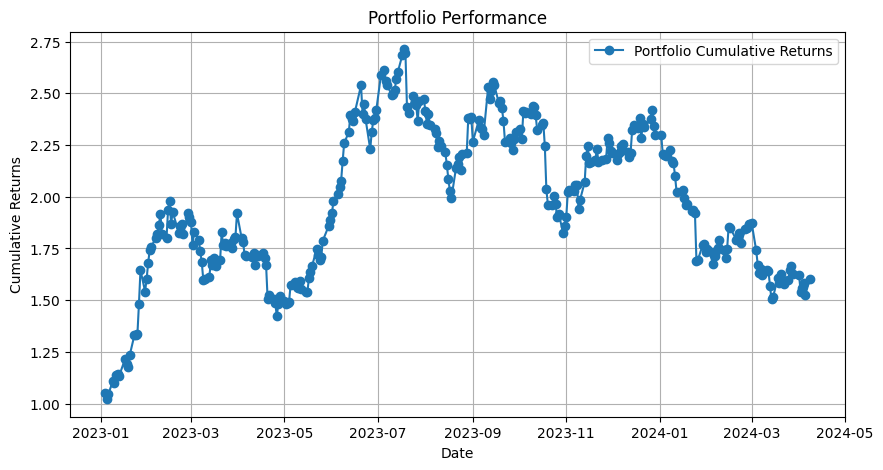

In [294]:
portfolio_returns = (1 + ohlc_data['Price_Change']).cumprod()

# Plot the cumulative portfolio returns
plt.figure(figsize=(10, 5))
plt.plot(portfolio_returns.index, portfolio_returns.values, label='Portfolio Cumulative Returns', marker='o')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Performance')
plt.legend()
plt.grid(True)
plt.show()